# Notebook imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Constants 

In [2]:

TOKEN_SPAM_PROB_FILE = 'SpamData\\03_Testing\\prob_spam.txt'
TOKEN_HAM_PROB_FILE = 'SpamData\\03_Testing\\prob_non_spam.txt'
TOKEN_ALL_PROB_FILE = 'SpamData\\03_Testing\\prob_all.txt'

TEST_FEATURE_MATIX = 'SpamData\\03_Testing\\test-features.txt'
TEST_TARGET_FILE = 'SpamData\\03_Testing\\test-target.txt'

VOCAB_SIZE = 2500

# Load the data

In [19]:
# features
X_test = np.loadtxt(TEST_FEATURE_MATIX,delimiter=' ')
#target 
y_test = np.loadtxt(TEST_TARGET_FILE,delimiter=' ')

# Token Probabilities
prob_token_spam = np.loadtxt(TOKEN_SPAM_PROB_FILE,delimiter=' ')
prob_token_ham = np.loadtxt(TOKEN_HAM_PROB_FILE,delimiter=' ')
prob_all_tokens = np.loadtxt(TOKEN_ALL_PROB_FILE,delimiter=' ')

In [20]:
X_test[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 2., 1., ..., 0., 0., 0.],
       [3., 0., 1., ..., 0., 0., 0.],
       [5., 1., 2., ..., 0., 0., 0.],
       [1., 2., 0., ..., 0., 0., 0.]])

# Calculating the joint probability

### the dot product

In [21]:
X_test.shape

(1723, 2500)

In [22]:
prob_token_spam.shape

(2500,)

# Set the Prior


  $$  P(Spam \, | \, X ) = \frac{P(X\, | \, Spam \,) \,P(Spam)}
  {P(X)}  $$

In [17]:
PROB_SPAM = 0.3116

In [24]:
joint_log_spam =  X_test.dot(np.log(prob_token_spam)  - np.log(prob_all_tokens)) + np.log(PROB_SPAM)


  $$  P(Ham \, | \, X ) = \frac{P(X\, | \, Ham \,) \,P(1-Spam)}
  {P(X)}  $$

In [25]:
joint_log_ham =  X_test.dot(np.log(prob_token_ham)  - np.log(prob_all_tokens)) + np.log(1-PROB_SPAM)

In [30]:
joint_log_ham[0:5]
joint_log_ham.shape

(1723,)

In [31]:
joint_log_spam[0:5]
joint_log_spam.shape

(1723,)

# Making Predictions

### Checking for the higher joint probility
$$  P(\,Spam|\,X) > \, P(Ham\,|\, X)  $$
   <center>OR</center>
   $$ P(\,Spam|\,X) < \, P(Ham\,|\, X)$$

In [32]:
prediction = joint_log_spam > joint_log_ham

In [34]:
prediction[-5:]

array([False, False, False, False, False])

# Simplify

$$ P(X\, | \, Spam \,) \,P(Spam)\, != \frac{P(X\, | \, Spam \,) \,P(Spam)}
  {P(X)}  $$

In [35]:
joint_log_ham =  X_test.dot(np.log(prob_token_ham)) + np.log(1-PROB_SPAM)
joint_log_spam = X_test.dot(np.log(prob_token_spam)) + np.log(PROB_SPAM)

# Metrics and Evaluation

## Accuaracy

In [46]:
correct_doc = (y_test == prediction).sum()
numdocs_worn = X_test.shape[0]-correct_doc
print('Num of docs classified correctly ',correct_doc)
print('Num of docs classified incorrectly ',numdocs_worn)

Num of docs classified correctly  1589
Num of docs classified incorrectly  134


In [ ]:
#Accuracy = no of corrt pred/total pred

In [43]:
correct_doc/len(X_test)

0.922228670922809

In [48]:
fraction_worng = numdocs_worn/len(X_test)
fraction_worng

0.07777132907719095

In [50]:
print('Fraction classified incorrectly is {:.2%}'.format(fraction_worng))
print('Fraction classified incorrectly is {:.2%}'.format(1-fraction_worng))

Fraction classified incorrectly is 7.78%
Fraction classified incorrectly is 92.22%


## Visualising the Results

In [57]:
#Chart styling Info

yaxis_label = 'P(X|Spam)'
xaxis_label = 'P(X|NonSpam)'

linedata = np.linspace(-14000,1,1000)

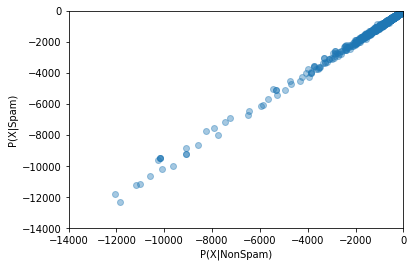

In [55]:
plt.xlabel(xaxis_label)
plt.ylabel(yaxis_label)
plt.scatter(joint_log_ham,joint_log_spam,alpha=0.4)
plt.xlim([-14000,1])
plt.ylim([-14000,1])
plt.show()

# The Decision Boundary

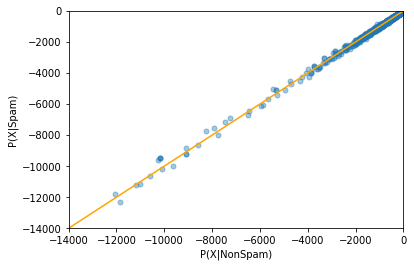

In [63]:
plt.xlabel(xaxis_label)
plt.ylabel(yaxis_label)
plt.scatter(joint_log_ham,joint_log_spam,alpha=0.4,s=25)
plt.plot(linedata,linedata,color = 'orange')
plt.xlim([-14000,1])
plt.ylim([-14000,1])
plt.show()

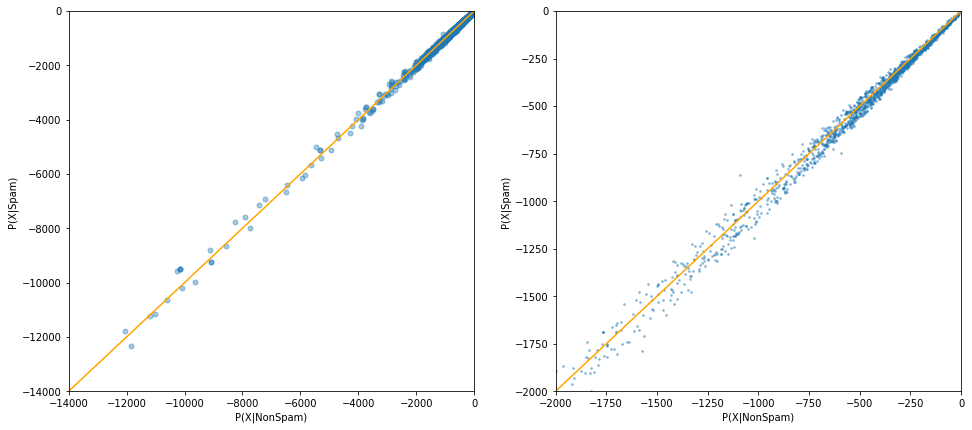

In [68]:
plt.figure(figsize=(16,7))
#chart num 1
plt.subplot(1,2,1)
plt.xlabel(xaxis_label)
plt.ylabel(yaxis_label)
plt.scatter(joint_log_ham,joint_log_spam,alpha=0.4,s=25)
plt.plot(linedata,linedata,color = 'orange')
plt.xlim([-14000,1])
plt.ylim([-14000,1])

#chart num 2
plt.subplot(1,2,2)

plt.xlabel(xaxis_label)
plt.ylabel(yaxis_label)
plt.scatter(joint_log_ham,joint_log_spam,alpha=0.4,s=3)
plt.plot(linedata,linedata,color = 'orange')
plt.xlim([-2000,1])
plt.ylim([-2000,1])

plt.show()

In [73]:
#Chart styleing

sns.set_style('whitegrid')
labels = "Actual Category"

summary_df = pd.DataFrame({xaxis_label:joint_log_spam,
                         yaxis_label:joint_log_ham,
                          labels:y_test})

C:\Users\AI\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


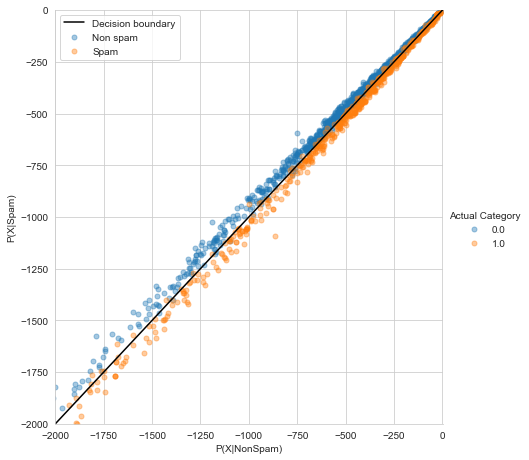

In [77]:
sns.lmplot(x=xaxis_label,y=yaxis_label,data=summary_df,size=6.5,
          fit_reg=False,scatter_kws={'alpha':0.4,'s':25},
          hue=labels)
plt.plot(linedata,linedata,color='black')
plt.xlim([-2000,1])
plt.ylim([-2000,1])
plt.legend(('Decision boundary','Non spam','Spam'))
plt.show()

### False Positives ans False Negatives

In [78]:
np.unique(prediction,return_counts=True)

(array([False,  True]), array([1187,  536], dtype=int64))

In [79]:
true_pos = (y_test == 1) & (prediction ==1)

In [80]:
true_pos.sum()

495

In [82]:
false_pos = (y_test == 0) & (prediction ==1)
false_neg = (y_test == 1) & (prediction ==0)

In [84]:
false_pos.sum()

41

In [85]:
false_neg.sum()

93

# Precision Score

precision = tp/tp+fp

In [92]:
precision = true_pos.sum()/(true_pos.sum()+false_pos.sum())
recall = true_pos.sum()/(true_pos.sum()+false_neg.sum())

In [93]:
print('precision score is {:.3}'.format(precision))

precision score is 0.924


In [95]:
print('precision score is {:.3}'.format(recall))

precision score is 0.842


# F1 score

#### Harmonic avarage, harmonic meana, considers false positive,false nagatives

In [98]:
f1_score = 2 *(precision*recall)/(precision+recall)

print('F Score is {:.2}'.format(f1_score))
#f1_score

F Score is 0.88
